In [ ]:
ls

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False)

In [ ]:
df.head(2)

In [3]:
year_columns = [col for col in df.columns if col.startswith("Y")]
df_long = pd.melt(
                df,
                id_vars = ['Area', 'Item', 'Element', 'Unit'], 
                value_vars = year_columns, 
                var_name = 'Year',
                value_name = 'Value')
df_long['Year'] = df_long['Year'].str.extract(r'Y(\d{4})')[0]
df_long = df_long.dropna(subset= 'Value')
df_long['Value'] = pd.to_numeric(df_long['Value'], errors = 'coerce')
df_long = df_long[df_long['Value'] != 0]

In [ ]:
df_long.head(5)

In [ ]:
# Compare trends for multiple crops:
## line plots of production over time
## highlight smootheed vs. raw trends
#df_long['Item'].unique()
selected_corps= ['Camels', 'Dates', 'Watermelons', 'Wheat']
df_crops = df_long[df_long['Item'].isin(selected_corps)]
df_crops

In [ ]:
# selected by year and crop and aggregated value:
df_trends = df_crops.groupby(['Year','Item'])['Value'].sum().reset_index()

In [ ]:
df_trends.head(5)

In [ ]:
# calculate smoothed trends (Rolling over):
df_trends['Smoothed'] = df_trends.groupby('Item')['Value'].transform(lambda x: x.rolling(window = 3, min_periods = 1).mean())

In [ ]:
# Plot Raw vs. Smoothed Trends:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.lineplot(data = df_trends, x= 'Year', y= 'Value', hue= 'Item', style = 'Item')

In [ ]:
sns.lineplot(data = df_trends, x= 'Year', y= 'smoothed', hue= 'Item', style = 'Item', linewidth= 2.5)
plt.ylabel('Production')
plt.xlabel('Year')
plt.x
plt.tight_layout()


In [ ]:
# Calculate the percentage change and CAGR:
# Calculate the percentage change in production for each crop
df_trends['growth'] = df_trends.groupby('Item')['Value'].transform(lambda x : x.pct_change() * 100)

In [ ]:
# Filter Wheat Data(Germany):
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#select wheat data for germany

In [ ]:
df_germany= df_long[(df_long['Area'] == 'Germany') & (df_long['Item'] == 'Wheat')]

In [ ]:
# drop na and reset index:
df_germany= df_germany.dropna(subset=['Value']).reset_index(drop=True)

In [ ]:
# prepare features:
x = df_germany[['Year']]# feature
y = df_germany['Value'] # target

In [ ]:
# train linear model:
model= LinearRegression()
model.fit(x, y)

In [ ]:
df_germany['Year'] = df_germany['Year'].astype(int)

In [ ]:
# make prediction:
future_years = pd.DataFrame({'Year': list(range(df_germany['Year'].min(), 2031))})
predictions= model.predict(future_years)
plt.figure(figsize=(12, 6))
plt.scatter(df_germany['Year'], df_germany['Value'], label = 'Actual')
plt.plot(future_years['Year'], predictions, label = 'Forecast (Linear Regression)')
plt.xlabel('Year')
plt.title('Wheat Production Forecast (Germany)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Adding Moving Average (Trend Smoothing):
df_germany.head(5)

In [ ]:
df_germany= df_germany.sort_values('Year')

In [ ]:
df_germany

In [ ]:
# Add a three years moving average:
df_germany['MA_3'] = df_germany['Value'].rolling(window= 3, center= True).mean()

In [ ]:
# plot original vs. moving average:
plt.figure(figsize=(12, 6))
plt.plot(df_germany['Year'], df_germany['Value'], label = 'Original', marker = 'o')
plt.plot(df_germany['Year'], df_germany['MA_3'], label = '3 year moving average', linewidth= 3)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Wheat Production in germany with 3-year moving Average')
plt.grid()
plt.legend()
plt.show()

In [ ]:
ls

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', low_memory=False) 

In [ ]:
df.head(3)

In [ ]:
year_columns = [col for col in df.columns if col.startswith('Y')]
df_long_2= pd.melt(
                 df,
                 id_vars = ['Area', 'Item', 'Unit'],
                 value_vars =  year_columns,
                 value_name = 'Value',
                 var_name = 'Year')
df_long_2['Year'] = df_long_2['Year'].str.extract(r'Y(\d{4})')[0].astype(int)
df_long_2= df_long_2.dropna(subset= 'Value')
df_long_2 = df_long_2[df_long_2['Value'] != 0]
df_long_2.reset_index()

In [ ]:
df_long.shape

In [ ]:
year_columns = [col for col in df.columns if col.startswith("Y")]
df_long = pd.melt(
                df,
                id_vars = ['Area', 'Item', 'Element', 'Unit'], 
                value_vars = year_columns, 
                var_name = 'Year',
                value_name = 'Value')
df_long['Year'] = df_long['Year'].str.extract(r'Y(\d{4})')[0]
df_long = df_long.dropna(subset= 'Value')
df_long['Value'] = pd.to_numeric(df_long['Value'], errors = 'coerce')
df_long = df_long[df_long['Value'] != 0]

In [ ]:
df_long.shape

In [4]:
wheat_usa = df_long[(df_long['Area'] == "United States of America") & (df_long['Item'] == 'Wheat')].copy()

In [ ]:
wheat_usa['Year'] = wheat_usa['Year'].astype(int)
wheat_usa.sort_values('Year', inplace= True)
wheat_usa.set_index('Year', inplace=True)

In [ ]:
wheat_usa.shape

In [ ]:
wheat_usa

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
wheat_usa['Value'].plot(title= 'Wheat Production in USA')
plt.xlim(1960, 2025)
new_ticks = np.arange(1960, 2025, 5)
plt.xticks(new_ticks);

In [ ]:
# make the series stationary (Differencing):
# ARIMA needs the series to be stationary (no trend or seasonality
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(wheat_usa['Value'].dropna())
print(f'ADF Statstics: {result[0]}')
print(f'p-value: {result[1]}')
#If p-value > 0.05: the series is non-stationary — we’ll need to difference it.

In [ ]:
#differencing to remove trend:
wheat_diff = wheat_usa['Value'].diff().dropna()

In [ ]:
wheat_diff.plot(title= 'Differenced Wheat Production in USA')

/home/moh/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/moh/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/moh/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/moh/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/moh/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is avai

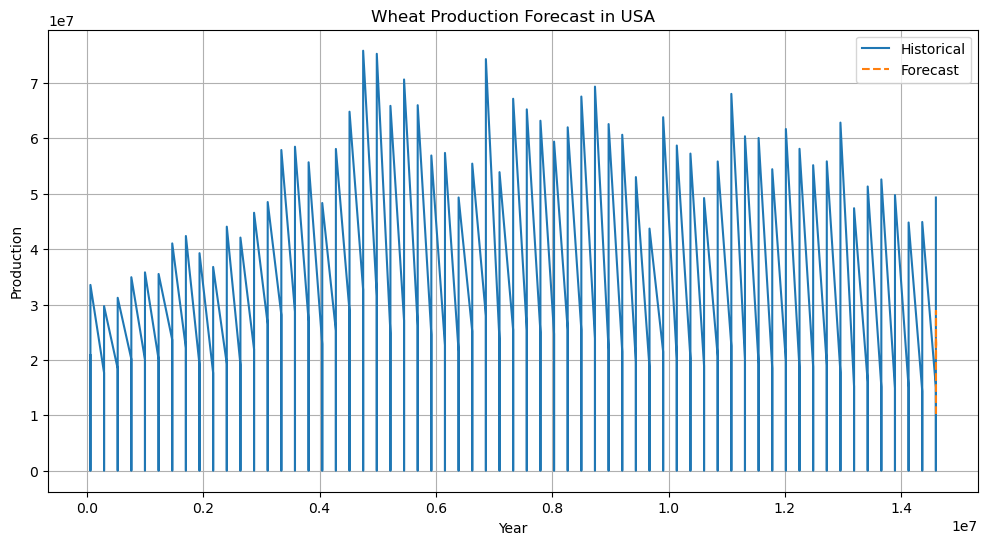

In [43]:
#Fit ARIMA Model:
#from statsmodels.tsa.arima import ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(wheat_usa['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
#print(model_fit.summary())
# step 4 foracast futre Production:
forecast = model_fit.forecast(steps = 10)
future_years = range(wheat_usa.index.max() + 1, wheat_usa.index.max() + 11)
wheat_usa['Value'].plot(label = 'Historical', figsize = (12, 6))
forecast.index= future_years
forecast.plot(label = 'Forecast', linestyle = '--')
plt.legend()
plt.title('Wheat Production Forecast in USA')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid()
plt.show()

In [19]:
#Compare forecasting models by applying
# 1- Simple Moving Average (SMA)
# 2- LIner Regression 
# 3- ARIMA
# simple moving average with a three years window =>


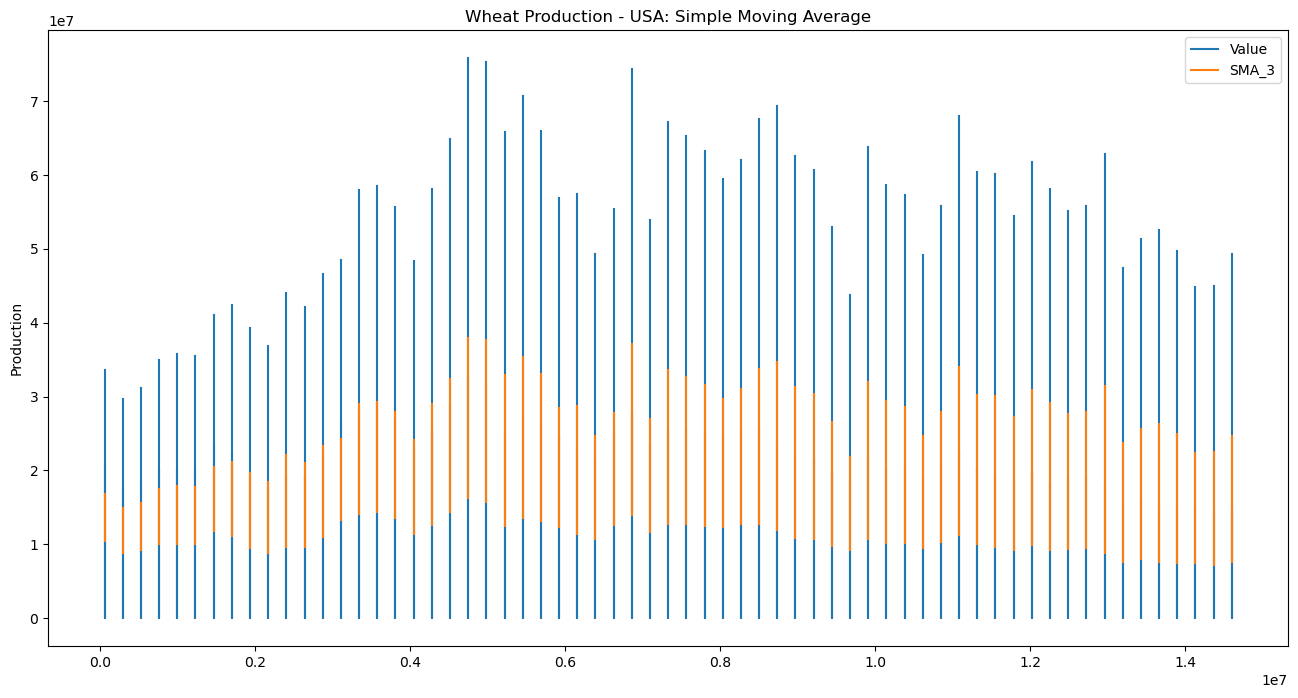

In [22]:
# Simple Moving Average with a 3-year window
wheat_usa['SMA_3'] = wheat_usa['Value'].rolling(window=2).mean()

# Plot SMA
wheat_usa[['Value', 'SMA_3']].plot(figsize=(16, 8), title='Wheat Production - USA: Simple Moving Average')
plt.ylabel('Production')
plt.show()

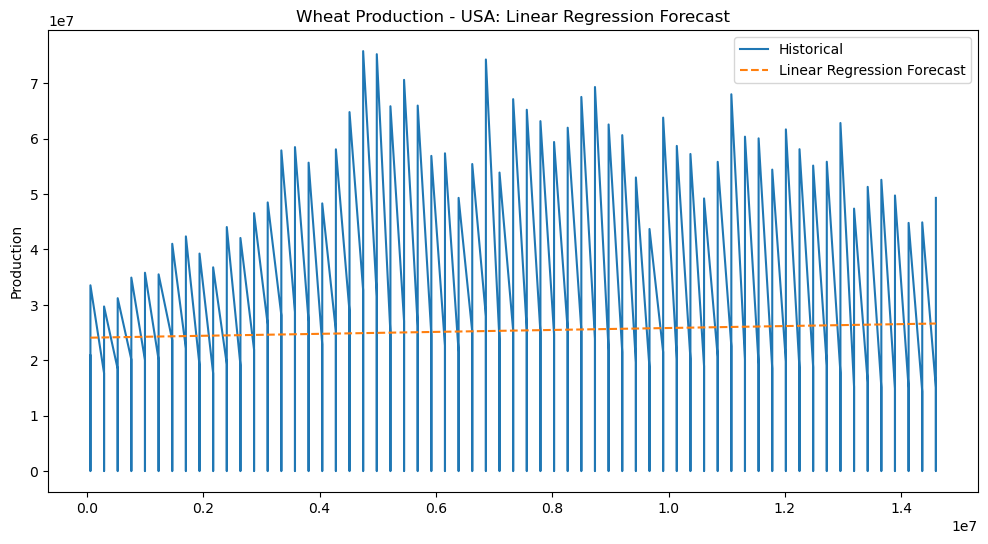

In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = wheat_usa.index.values.reshape(-1, 1)
y = wheat_usa['Value'].values

# Train model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Predict on training + 10 future years
future_index = np.arange(wheat_usa.index.max() + 1, wheat_usa.index.max() + 11).reshape(-1, 1)
X_full = np.vstack([X, future_index])
y_pred = model_lr.predict(X_full)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(wheat_usa.index, y, label='Historical')
plt.plot(X_full.flatten(), y_pred, label='Linear Regression Forecast', linestyle='--')
plt.title('Wheat Production - USA: Linear Regression Forecast')
plt.legend()
plt.ylabel('Production')
plt.show()

In [ ]:
# Forecast the next 10 years
forecast = model_fit.forecast(steps=10)

# Create future year index
future_years = range(wheat_usa.index.max() + 1, wheat_usa.index.max() + 11)

# Assign index to forecast
forecast.index = future_years

# Plot actual and forecast
wheat_usa['value'].plot(label='Historical', figsize=(12,6))
forecast.plot(label='Forecast', linestyle='--')
plt.legend()
plt.title('Wheat Production Forecast in USA')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid()
plt.show()

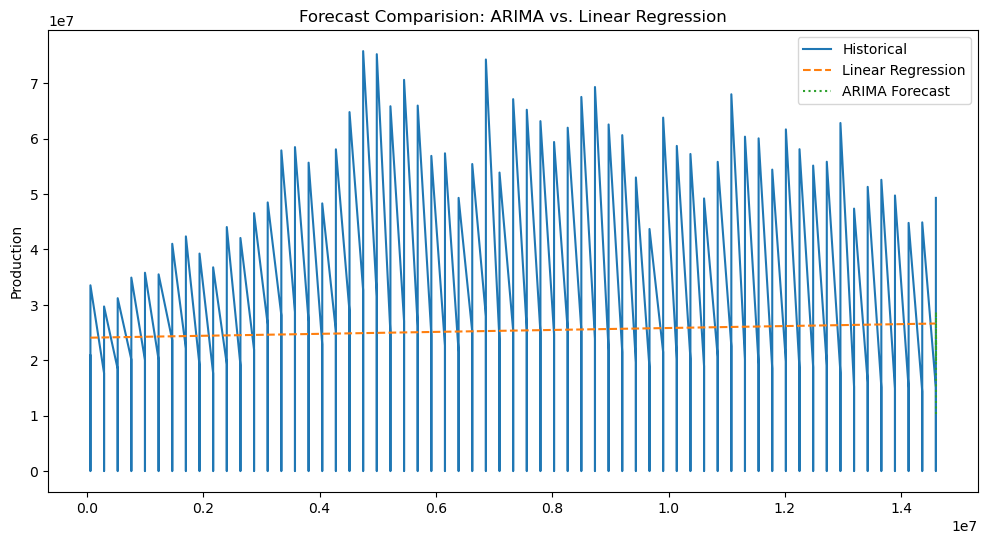

In [45]:
# compare with ARIMA forecast:
plt.figure(figsize=(12, 6))
plt.plot(wheat_usa.index, wheat_usa['Value'], label= 'Historical')
plt.plot(x_full.flatten(), y_pred, label= 'Linear Regression', linestyle = '--')
plt.plot(range(wheat_usa.index.max() + 1, wheat_usa.index.max() + 11), forecast, label = 'ARIMA Forecast', linestyle = ':')
plt.title('Forecast Comparision: ARIMA vs. Linear Regression')
plt.legend()
plt.ylabel('Production')
plt.show()